**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Importing files**


In [6]:
from google.colab import files
upload = files.upload()

Saving marketing_campaign_data.csv to marketing_campaign_data.csv


**Sales and Revenue Analysis**

Region
East     1981.705263
North    2016.410526
South    1891.263158
West     1566.410526
Name: Units_Sold, dtype: float64


,Average_Revenue
Region,
East,29258.401257
North,26719.079357
South,25252.897045
West,26428.739579


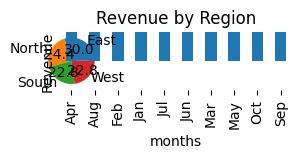

In [8]:
# Sales

df1 = pd.read_csv('sales_data.csv')

df1['Region'].unique()
df1['Product'].unique()

df1['Date'] = pd.to_datetime(df1['Date'])


# handling duplicates

df1.drop_duplicates(inplace=True)

# finding mean
x = df1['Units_Sold'].mean()
df1.fillna({'Units_Sold':x},inplace=True)

y = df1['Revenue'].mean()

df1.fillna({'Revenue':y},inplace=True)




# total sales by product

df1.groupby('Product')[['Units_Sold','Revenue']].sum()

# total sales by each region

print(df1.groupby('Region')['Units_Sold'].sum())

# graph to represent total sales by product

df1.groupby('Product')['Units_Sold'].sum().plot(kind='bar',color=['green'],figsize=(5,3),title='Sales by  product')

# graph to represent total revenue by region

df1.groupby('Region')['Revenue'].sum().plot(kind='pie',autopct='%1.1f',figsize=(3,4),title='Revenue by Region')

df1['months'] = df1['Date'].dt.month

df1.sort_values(by='months',ascending=True,inplace=True)



df1['months'] = df1['months'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})


# total sales in south region by months

df1.where(df1['Region']=='South').groupby(['months'])['Units_Sold'].sum().plot(kind='bar')


# Average  revenue by  product

df1.groupby('Product').agg(Average_Revenue = ('Revenue','mean'))

# Average revenue for each region

df1.groupby('Region').agg(Average_Revenue = ('Revenue','mean'))


**Traffic Trends and Customer visits**

993.0
56.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             300 non-null    datetime64[ns]
 1   Region           300 non-null    object        
 2   Store_ID         300 non-null    object        
 3   Customer_Visits  300 non-null    float64       
 4   months           300 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 11.8+ KB


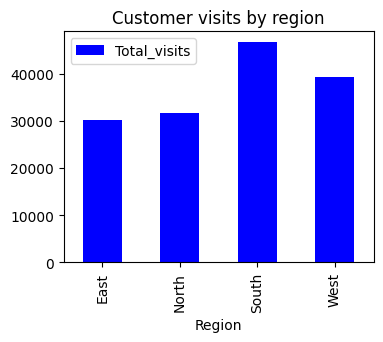

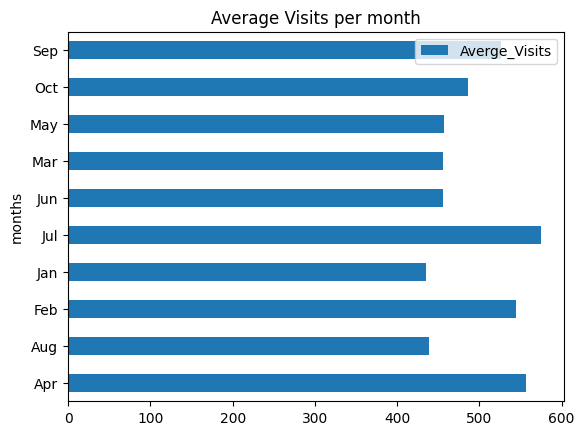

In [10]:
# Traffic data

df2 = pd.read_csv('traffic_data.csv')

df2['Region'].unique()
df2['Date'] = pd.to_datetime(df2['Date'])

df2.drop_duplicates(inplace=True)

x = df2['Customer_Visits'].mean()

df2.fillna({'Customer_Visits':x},inplace=True)


# total customer visits per region

df2.groupby('Region').agg(Total_visits =('Customer_Visits','sum')).plot(kind='bar',color='blue',figsize=(4,3),title='Customer visits by region')

# maximum visits

print(df2['Customer_Visits'].max())

# minimum visits

print(df2['Customer_Visits'].min())

df2['months'] = df2['Date'].dt.month
df2['months'] = df2['months'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})


# Avg customer visits per months

df2.groupby('months').agg(Averge_Visits = ('Customer_Visits','mean')).plot(kind='barh',title='Average Visits per month')

df2.info()



**Customer Feedback Insights**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      300 non-null    datetime64[ns]
 1   Region    300 non-null    object        
 2   Store_ID  300 non-null    object        
 3   Product   300 non-null    object        
 4   Rating    300 non-null    Int64         
 5   Comments  300 non-null    object        
dtypes: Int64(1), datetime64[ns](1), object(4)
memory usage: 14.5+ KB


<Axes: title={'center': 'Average Customer Rating by Region '}, xlabel='Region', ylabel='Rating'>

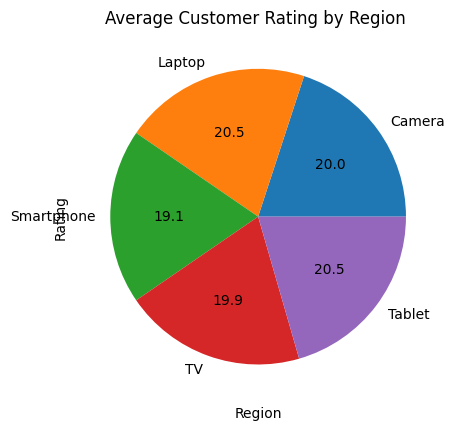

In [11]:
# Customer Feedback
df3 = pd.read_csv('customer_feedback_data.csv')

df3['Region'].unique()
df3['Product'].unique()
df3['Rating'].unique()

df3['Date'] = pd.to_datetime(df3['Date'])

df3.drop_duplicates(inplace=True)

x = int(df3['Rating'].mean())

df3['Rating'] = df3['Rating'].astype(pd.Int64Dtype())

df3.fillna({'Rating':x},inplace=True)

df3.info()

# Average rating for each product

round(df3.groupby('Product')['Rating'].mean(),2).plot(kind='pie',autopct='%1.1f',title='Average Customer Rating by products')

# Average rating by region

round(df3.groupby('Region')['Rating'].mean(),2).plot(kind='line',color='green',title='Average Customer Rating by Region ')

**Campaign And Budget Analysis**

In [23]:
# Market Compaign

df4 = pd.read_csv('marketing_campaign_data.csv')
df4['Region'].unique()
df4['Campaign_Type'].unique()
df4['Medium'].unique()

df4['Start_Date'] = pd.to_datetime(df4['Start_Date'])
df4['End_Date'] = pd.to_datetime(df4['End_Date'])


df4.drop_duplicates(inplace=True)

x = df4['Budget'].mean()

df4.fillna({'Budget':x},inplace=True)

df4.info()

# Total Budget for each region

round(df4.groupby('Region').agg(Total_Budget =('Budget','sum')),2).sort_values(by='Total_Budget',ascending=True)

# Total Budget by each campaign type

round(df4.groupby('Campaign_Type').agg(Total_Budget = ('Budget','sum')),2)

# total budget for different mode of campaigns

round(df4.groupby('Medium')['Budget'].sum(),2).plot(kind='bar',title='Total budget by medium')

# Total no.of compaigns by region

df4.groupby('Region')['Campaign_ID'].count().plot(kind='bar',color='orange',title='No. of Campaigns by region')

# campaigns types used

df4.groupby('Campaign_Type')['Campaign_ID'].count().plot(kind='barh',title='Types of Campaigns by frequency')

# total campaign budget for  south region

print(df4.where(df4['Region']=='South').groupby('Campaign_Type')['Budget'].sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Campaign_ID    300 non-null    object        
 1   Start_Date     300 non-null    datetime64[ns]
 2   End_Date       300 non-null    datetime64[ns]
 3   Region         300 non-null    object        
 4   Medium         300 non-null    object        
 5   Budget         300 non-null    float64       
 6   Campaign_Type  300 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 16.5+ KB
Campaign_Type
Billboard       432573.160000
Email           672579.651684
Radio           356587.430000
Social Media    377158.570561
TV Ad           485747.870561
Name: Budget, dtype: float64


In [ ]:
# graph
